# Statistics coded: Population structure and ageing

#### Loading the packages needed for some specific graphical representation

In [106]:
library(ggplot2)
library(tidyr)
library(plyr)
library(repr)
library(dplyr)
library(devtools)
library(restatapi)
library(reshape2)
library(plotly)
library(forcats)
library(scales)

## Past and future population ageing trends in the EU-27

### Figure 1: Population pyramids, EU-27, 2004 and 2019

- Define the subset of group ages I'm interested about
- Choose the dataset, filtering the data with the information I need: geopolitical entity (EU-27), time (2004 and 2019), sex (M,F) and the group of age (ageclass)

In [107]:
ageclass=c("Y_LT5","Y5-9", "Y10-14", "Y15-19","Y20-24","Y25-29","Y30-34","Y35-39","Y40-44","Y45-49","Y50-54","Y55-59","Y60-64","Y65-69","Y70-74","Y75-79","Y80-84", "Y_GE85")
str(ageclass)

 chr [1:18] "Y_LT5" "Y5-9" "Y10-14" "Y15-19" "Y20-24" "Y25-29" "Y30-34" ...


In [108]:
assign("dmethod","curl",envir=.restatapi_env) 
get_eurostat_dsd("demo_pjangroup",verbose=TRUE)
dataset1 <- get_eurostat_data(id="demo_pjangroup", filters=list(geo="EU27_2020", age=ageclass, sex=c("M","F")), date_filter=c(2004,2019), verbose=TRUE)

The 'demo_pjangroup.dsd' was loaded from 'demo_pjangroup.dsd' in '.restatapi_env'.


concept,code,name
<chr>,<chr>,<chr>
FREQ,D,Daily
FREQ,W,Weekly
FREQ,Q,Quarterly
FREQ,A,Annual
FREQ,S,Semi-annual
FREQ,M,Monthly
FREQ,H,Half-year
UNIT,NR,Number
SEX,T,Total


0.8.10	id%3Ddemo_pjangroup	filters%3Dlist(geo = "EU27_2020", age = ageclass, sex = c("M", "F"))	date_filter%3Dc(2004, 2019)	verbose%3DTRUE
The 'demo_pjangroup.dsd' was loaded from 'demo_pjangroup.dsd' in '.restatapi_env'.
date_filter: c20042019
filters: c20042019; is numeric: FALSE; call parents: 25
length df: 3 -*- df: c, 2004, 2019
2004, 2019 date filter length: 2, nchar date_filter: 4,4
date_filter: 2004, 2019 nrow dft: 2
..M+F.Y_LT5+Y5-9+Y10-14+Y15-19+Y20-24+Y25-29+Y30-34+Y35-39+Y40-44+Y45-49+Y50-54+Y55-59+Y60-64+Y65-69+Y70-74+Y75-79+Y80-84+Y_GE85.EU27_2020-?startPeriod=2004-01-01&endPeriod=2004-12-31?startPeriod=2019-01-01&endPeriod=2019-12-31
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/demo_pjangroup/..M+F.Y_LT5+Y5-9+Y10-14+Y15-19+Y20-24+Y25-29+Y30-34+Y35-39+Y40-44+Y45-49+Y50-54+Y55-59+Y60-64+Y65-69+Y70-74+Y75-79+Y80-84+Y_GE85.EU27_2020/?startPeriod=2004-01-01&endPeriod=2004-12-31
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/demo_pjangroup/..M+F.Y_LT5+Y5-9+Y10-14

- Rename the levels of the variable age for a better visualization of the age pyramid

In [109]:
levels(dataset1$age)[levels(dataset1$age)=="Y_LT5"] <- "<5"
levels(dataset1$age)[levels(dataset1$age)=="Y5-9"] <- "5-9"
levels(dataset1$age)[levels(dataset1$age)=="Y10-14"] <- "10-14"
levels(dataset1$age)[levels(dataset1$age)=="Y15-19"] <- "15-19"
levels(dataset1$age)[levels(dataset1$age)=="Y20-24"] <- "20-24"
levels(dataset1$age)[levels(dataset1$age)=="Y25-29"] <- "25-29"
levels(dataset1$age)[levels(dataset1$age)=="Y30-34"] <- "30-34"
levels(dataset1$age)[levels(dataset1$age)=="Y35-39"] <- "35-39"
levels(dataset1$age)[levels(dataset1$age)=="Y40-44"] <- "40-44"
levels(dataset1$age)[levels(dataset1$age)=="Y45-49"] <- "45-49"
levels(dataset1$age)[levels(dataset1$age)=="Y50-54"] <- "50-54"
levels(dataset1$age)[levels(dataset1$age)=="Y55-59"] <- "55-59"
levels(dataset1$age)[levels(dataset1$age)=="Y60-64"] <- "60-64"
levels(dataset1$age)[levels(dataset1$age)=="Y65-69"] <- "65-69"
levels(dataset1$age)[levels(dataset1$age)=="Y70-74"] <- "70-74"
levels(dataset1$age)[levels(dataset1$age)=="Y75-79"] <- "75-79"
levels(dataset1$age)[levels(dataset1$age)=="Y80-84"] <- "80-84"
levels(dataset1$age)[levels(dataset1$age)=="Y_GE85"] <- "85+"
dataset1

unit,age,sex,geo,time,values
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
NR,10-14,F,EU27_2020,2004,12392609
NR,10-14,F,EU27_2020,2019,11322538
NR,10-14,M,EU27_2020,2004,13022330
NR,10-14,M,EU27_2020,2019,11947145
NR,15-19,F,EU27_2020,2004,13126800
NR,15-19,F,EU27_2020,2019,11227333
NR,15-19,M,EU27_2020,2004,13767954
NR,15-19,M,EU27_2020,2019,11952147
NR,20-24,F,EU27_2020,2004,14155851


- Define the total amount of people for the two years, in this way it will be easier to compute the percentages

In [110]:
tot2019<-sum(dataset1[time=="2019"]$values)
tot2004<-sum(dataset1[time=="2004"]$values)

### Population pyramid graph: Figure 1

- Use of the function ggplot to create graphs and visualize data
- Use of the "option" function before to control the size of the graphs

In [111]:
options(repr.plot.width=10, repr.plot.height=10)

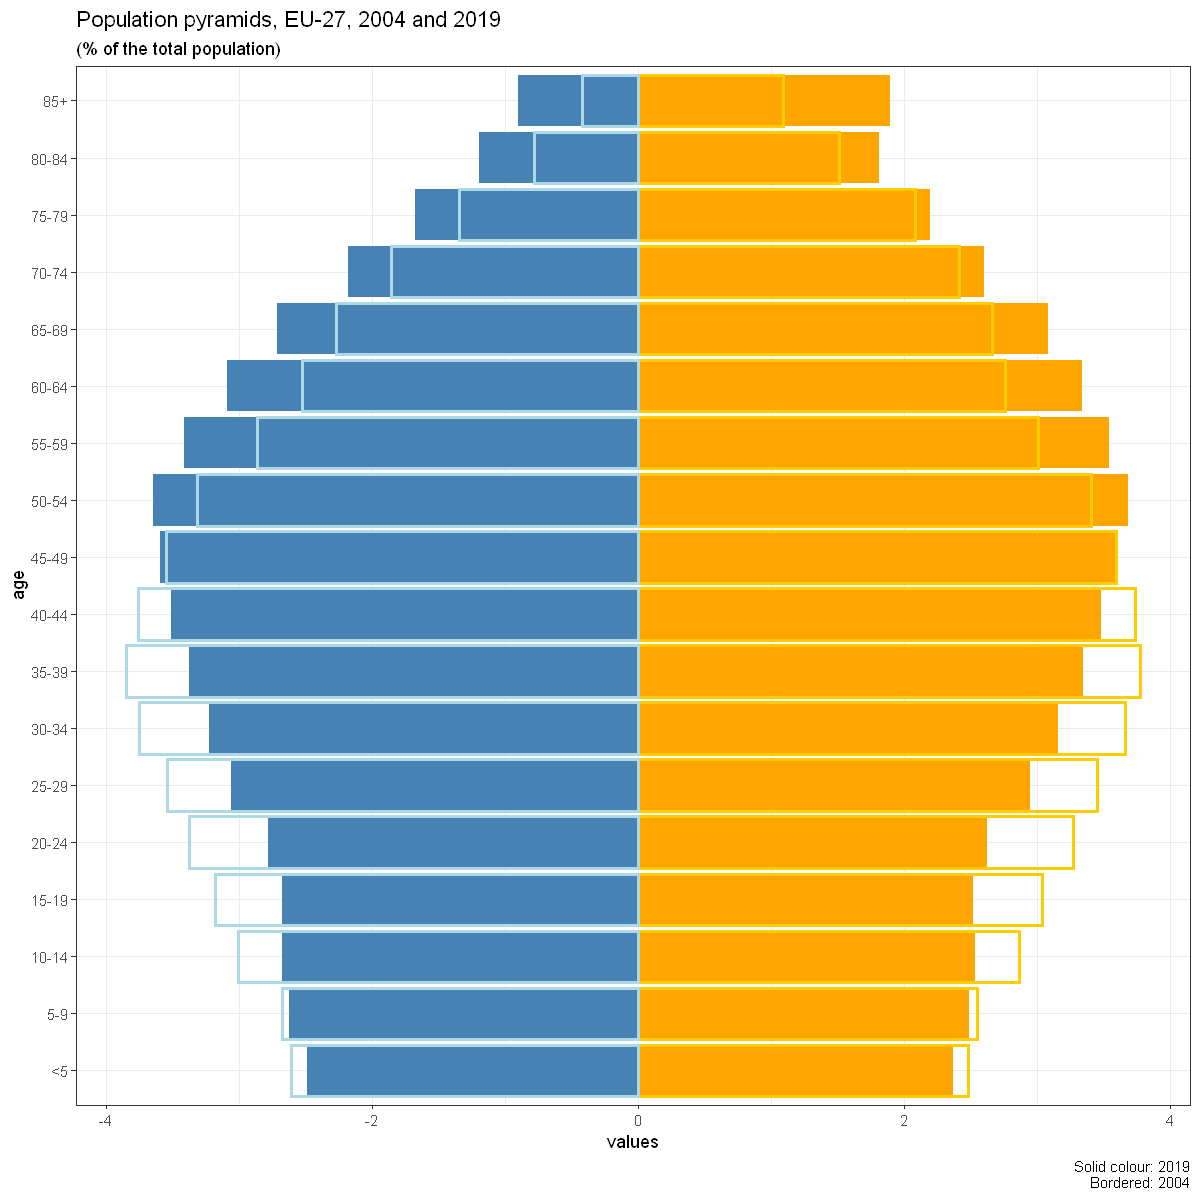

In [112]:
plot <- ggplot(dataset1, aes(x =age , y=values, fill= sex,)) + 

  geom_bar(data=subset(dataset1, sex == "F" & time=="2019" ),aes(y=(values)/tot2019*100), fill="orange", stat = "identity") + 
  geom_bar(data=subset(dataset1,sex == "M" &time=="2019"),aes(y=(-values)/tot2019*100), fill="steelblue", stat = "identity") +
  geom_bar(data=subset(dataset1, sex == "F" & time=="2004" ),aes(y=(values)/tot2004*100),fill="transparent", colour="#FFCC00", size=1, stat = "identity") + 
  geom_bar(data=subset(dataset1,sex == "M" &time=="2004"),aes(y=(-values)/tot2004*100), fill="transparent", colour="lightblue", size=1, stat = "identity") +
  scale_x_discrete(limits= c("<5","5-9", "10-14", "15-19","20-24","25-29","30-34", "35-39", "40-44","45-49","50-54","55-59","60-64","65-69","70-74", "75-79","80-84", "85+"))+
  coord_flip()+
  labs(title = "Population pyramids, EU-27, 2004 and 2019",
              subtitle = "(% of the total population)",
              caption = "Solid colour: 2019
                        Bordered: 2004")+
  theme(legend.position="bottom")+
            
  theme_bw()
  
print(plot)

### Figure 2:  Population pyramids, EU-27, 2019 and 2100

In [113]:
assign("dmethod","curl",envir=.restatapi_env) 
get_eurostat_dsd("proj_19np",verbose=TRUE)
dataset2 <- get_eurostat_data(id="proj_19np", filters=list(geo="EU27_2020", sex=c("M","F"), projection="BSL", freq="A"), verbose=TRUE)[time %in% c(2019,2100)]

The 'proj_19np.dsd' was loaded from 'proj_19np.dsd' in '.restatapi_env'.


concept,code,name
<chr>,<chr>,<chr>
FREQ,D,Daily
FREQ,W,Weekly
FREQ,Q,Quarterly
FREQ,A,Annual
FREQ,S,Semi-annual
FREQ,M,Monthly
FREQ,H,Half-year
PROJECTION,BSL,Baseline projections
PROJECTION,LFRT,Sensitivity test: lower fertility


0.8.10	id%3Dproj_19np	filters%3Dlist(geo = "EU27_2020", sex = c("M", "F"), projection = "BSL", freq = "A")	verbose%3DTRUE
The 'proj_19np.dsd' was loaded from 'proj_19np.dsd' in '.restatapi_env'.
A.BSL..M+F..EU27_2020-
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19np/A.BSL..M+F..EU27_2020/
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19np/A.BSL..M+F..EU27_2020/
code:  - severity:

restat - nrow:16728;ncol:8;colnames:UNIT/AGE/SEX/PROJECTION/GEO/FREQ/obsTime/obsValue


- Define a value for the total amount of population in 2019 and 2100
- Delete the total amount of population from the dataset, so that it will not be visualized in the graph

In [114]:
totproj2019 <-sum(dataset2[dataset2$time=="2019"& dataset2$age=="TOTAL" ]$values)
totproj2100<-sum(dataset2[dataset2$time=="2100" & dataset2$age=="TOTAL"]$values)
dataset2<-filter(dataset2, dataset2$age!="TOTAL")

- Group the ages in five-year classes 
- Group the values for all the age classes

In [115]:
dataset2$age <-ifelse(dataset2$age=="Y_LT1"|dataset2$age=="Y1"|dataset2$age=="Y2"|dataset2$age=="Y3"|dataset2$age=="Y4", "<5",
                 ifelse(dataset2$age=="Y5"|dataset2$age=="Y6"|dataset2$age=="Y7"|dataset2$age=="Y8"|dataset2$age=="Y9", "05-9",
                   ifelse(dataset2$age=="Y10"|dataset2$age=="Y11"|dataset2$age=="Y12"|dataset2$age=="Y13"|dataset2$age=="Y14", "10-14",
                         ifelse(dataset2$age=="Y15"|dataset2$age=="Y16"|dataset2$age=="Y17"|dataset2$age=="Y18"|dataset2$age=="Y19", "15-19",
                               ifelse(dataset2$age=="Y20"|dataset2$age=="Y21"|dataset2$age=="Y22"|dataset2$age=="Y23"|dataset2$age=="Y24", "20-24",
                                     ifelse(dataset2$age=="Y25"|dataset2$age=="Y26"|dataset2$age=="Y27"|dataset2$age=="Y28"|dataset2$age=="Y29","25-29",
                                           ifelse(dataset2$age=="Y30"|dataset2$age=="Y31"|dataset2$age=="Y32"|dataset2$age=="Y33"|dataset2$age=="Y34","30-34",
                                                 ifelse(dataset2$age=="Y35"|dataset2$age=="Y36"|dataset2$age=="Y37"|dataset2$age=="Y38"|dataset2$age=="Y39","35-39",
                                                       ifelse(dataset2$age=="Y40"|dataset2$age=="Y41"|dataset2$age=="Y42"|dataset2$age=="Y43"|dataset2$age=="Y44","40-44",
                                                             ifelse(dataset2$age=="Y45"|dataset2$age=="Y46"|dataset2$age=="Y47"|dataset2$age=="Y48"|dataset2$age=="Y49","45-49",
                                                                   ifelse(dataset2$age=="Y50"|dataset2$age=="Y51"|dataset2$age=="Y52"|dataset2$age=="Y53"|dataset2$age=="Y54", "50-54",
                                                                         ifelse(dataset2$age=="Y55"|dataset2$age=="Y56"|dataset2$age=="Y57"|dataset2$age=="Y58"|dataset2$age=="Y59","55-59",
                                                                               ifelse(dataset2$age=="Y60"|dataset2$age=="Y61"|dataset2$age=="Y62"|dataset2$age=="Y63"|dataset2$age=="Y64","60-64",
                                                                                     ifelse(dataset2$age=="Y65"|dataset2$age=="Y66"|dataset2$age=="Y67"|dataset2$age=="Y68"|dataset2$age=="Y69","65-69",
                                                                                           ifelse(dataset2$age=="Y70"|dataset2$age=="Y71"|dataset2$age=="Y72"|dataset2$age=="Y73"|dataset2$age=="Y74", "70-74",
                                                                                                 ifelse(dataset2$age=="Y75"|dataset2$age=="Y76"|dataset2$age=="Y77"|dataset2$age=="Y78"|dataset2$age=="Y79","75-79",
                                                                                                       ifelse(dataset2$age=="Y80"|dataset2$age=="Y81"|dataset2$age=="Y82"|dataset2$age=="Y83"|dataset2$age=="Y84","80-84",
                                                                                                             "85+")))))))))))))))))


In [116]:
data<-dataset2 %>%
    group_by(age,sex,time) %>%
    summarise(value_tot=sum(values))
data

`summarise()` regrouping output by 'age', 'sex' (override with `.groups` argument)


age,sex,time,value_tot
<chr>,<fct>,<fct>,<dbl>
<5,F,2019,10571075
<5,F,2100,9235374
<5,M,2019,11126001
<5,M,2100,9749771
05-9,F,2019,11118011
05-9,F,2100,9440604
05-9,M,2019,11723042
05-9,M,2100,9885363
10-14,F,2019,11322538


### Population pyramid graph: Figure 2

- Plot the graph, considering the percentages not the values

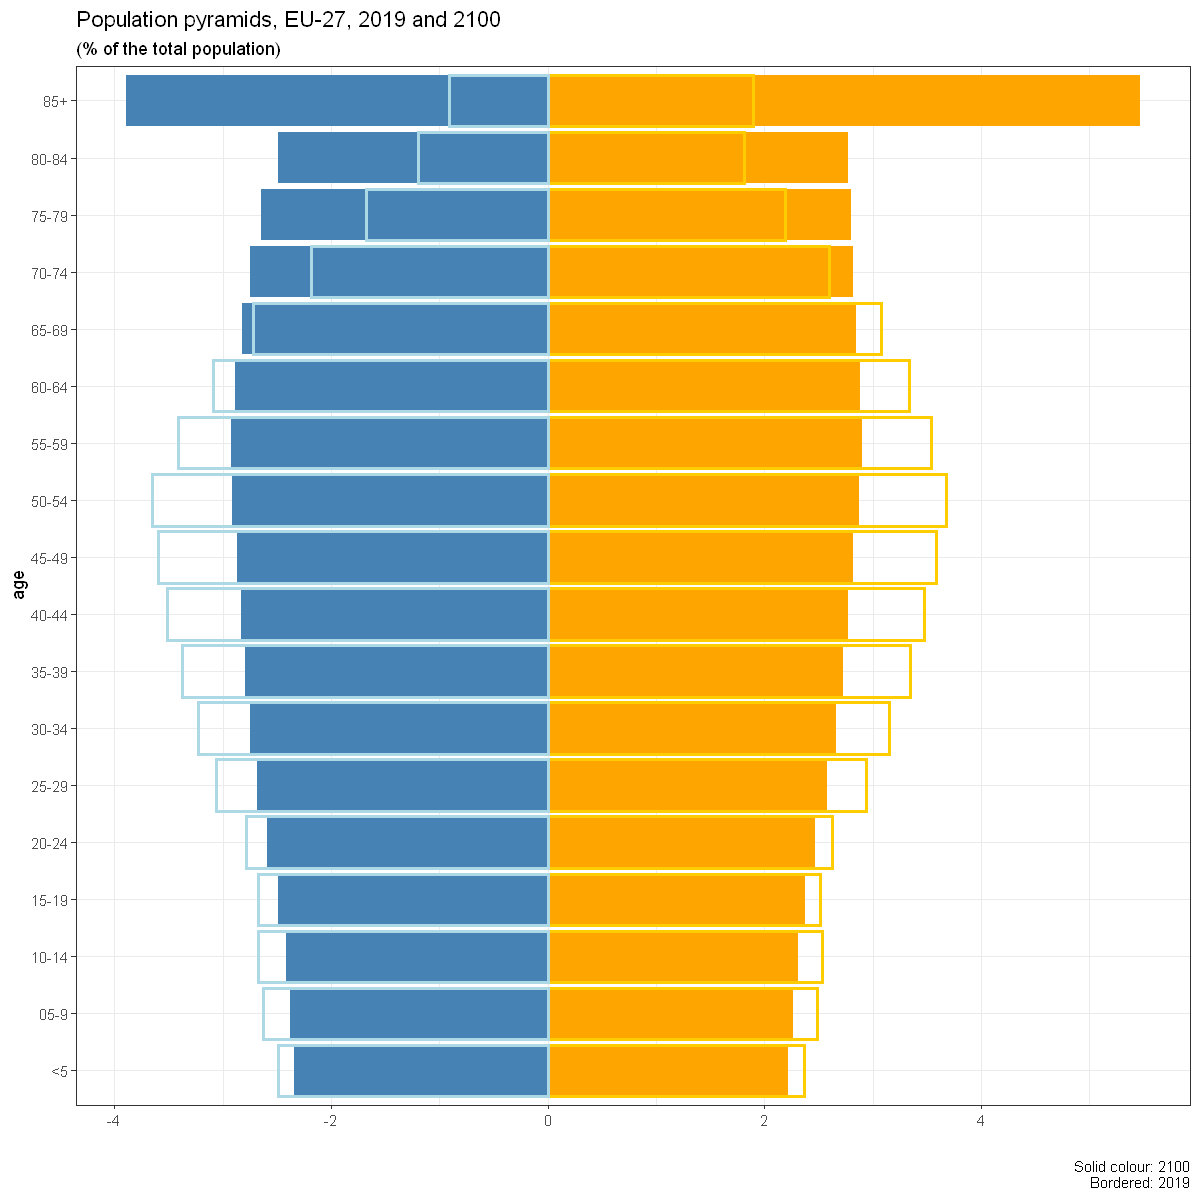

In [117]:
plot2 <- ggplot(data, aes(x=age , y=value_tot, fill= sex)) + 

  geom_bar(data=subset(data, sex == "F" & time=="2100" ),aes(y=(value_tot)/totproj2100*100), fill="orange", stat = "identity") + 
  geom_bar(data=subset(data,sex == "M" &time=="2100"),aes(y=(-value_tot)/totproj2100*100), fill="steelblue", stat = "identity") +
  geom_bar(data=subset(data, sex == "F" & time=="2019" ),aes(y=(value_tot)/totproj2019*100),fill="transparent", colour="#FFCC00", size=1, stat = "identity") + 
  geom_bar(data=subset(data,sex == "M" &time=="2019"),aes(y=(-value_tot)/totproj2019*100), fill="transparent", colour="lightblue", size=1, stat = "identity") +
ylab("")+
labs(title = "Population pyramids, EU-27, 2019 and 2100",
              subtitle = "(% of the total population)",
              caption = "Solid colour: 2100
                        Bordered: 2019")+
coord_flip()+
theme_bw()

  
print(plot2)

### Figure 3: Population structure by major age groups, EU-27, 2019-2100

- Load the dataset

In [124]:
assign("dmethod","curl",envir=.restatapi_env) 
get_eurostat_dsd("proj_19ndbi",verbose=TRUE)
dataset3 <- get_eurostat_data(id="proj_19ndbi", filters=list(geo="EU27_2020", projection="BSL", indic_de=c("PC_Y0_14", "PC_Y15_64","PC_Y65_MAX","PC_Y80_MAX")), verbose=TRUE)[time %in% c(2019, 2030,2040,2050,2060,2070,2080,2090,2100)]

The 'proj_19ndbi.dsd' was loaded from 'proj_19ndbi.dsd' in '.restatapi_env'.


concept,code,name
<chr>,<chr>,<chr>
FREQ,D,Daily
FREQ,W,Weekly
FREQ,Q,Quarterly
FREQ,A,Annual
FREQ,S,Semi-annual
FREQ,M,Monthly
FREQ,H,Half-year
PROJECTION,BSL,Baseline projections
PROJECTION,LFRT,Sensitivity test: lower fertility


0.8.10	id%3Dproj_19ndbi	filters%3Dlist(geo = "EU27_2020", projection = "BSL", indic_de = c("PC_Y0_14", "PC_Y15_64", "PC_Y65_MAX", "PC_Y80_MAX"))	verbose%3DTRUE
The 'proj_19ndbi.dsd' was loaded from 'proj_19ndbi.dsd' in '.restatapi_env'.
.BSL.PC_Y0_14+PC_Y15_64+PC_Y65_MAX+PC_Y80_MAX.EU27_2020-
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19ndbi/.BSL.PC_Y0_14+PC_Y15_64+PC_Y65_MAX+PC_Y80_MAX.EU27_2020/
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19ndbi/.BSL.PC_Y0_14+PC_Y15_64+PC_Y65_MAX+PC_Y80_MAX.EU27_2020/
code:  - severity:

restat - nrow:328;ncol:6;colnames:PROJECTION/INDIC_DE/GEO/FREQ/obsTime/obsValue


- Rename the levels of the variable "demographic inficator" to have a better visualization of the graph

In [125]:
levels(dataset3$indic_de)[levels(dataset3$indic_de)=="PC_Y0_14"] <- "0-14"
levels(dataset3$indic_de)[levels(dataset3$indic_de)=="PC_Y15_64"] <- "15-64"
levels(dataset3$indic_de)[levels(dataset3$indic_de)=="PC_Y65_MAX"] <- "65+"
levels(dataset3$indic_de)[levels(dataset3$indic_de)=="PC_Y80_MAX"] <- "80+"
dataset3

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<fct>,<dbl>
BSL,0-14,EU27_2020,2019,15.2
BSL,0-14,EU27_2020,2030,14.0
BSL,0-14,EU27_2020,2040,13.6
BSL,0-14,EU27_2020,2050,13.7
BSL,0-14,EU27_2020,2060,13.6
BSL,0-14,EU27_2020,2070,13.6
BSL,0-14,EU27_2020,2080,13.9
BSL,0-14,EU27_2020,2090,13.9
BSL,0-14,EU27_2020,2100,13.9


- Problem: the category "65+" considers also the values fo the level "85+", there is an overlapping of percentages
- To solve this issue we need to define a vector ("years") to be used in the for loop that will subtract the value of "85+" from the category "65+" when the years coincide
- Rename the category into "65-79"

In [126]:
years <-c("2019","2030","2040","2050","2060","2070","2080","2090","2100")
str(years)

 chr [1:9] "2019" "2030" "2040" "2050" "2060" "2070" "2080" "2090" "2100"


In [127]:
for(i in 1:length(years)){
    year <-years[i]
    dataset3[dataset3$time==year & dataset3$indic_de=="65+", 5]<-dataset3[dataset3$time==year & dataset3$indic_de=="65+", 5] - dataset3[dataset3$time==year & dataset3$indic_de=="80+", 5]
}
dataset3

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<fct>,<dbl>
BSL,0-14,EU27_2020,2019,15.2
BSL,0-14,EU27_2020,2030,14.0
BSL,0-14,EU27_2020,2040,13.6
BSL,0-14,EU27_2020,2050,13.7
BSL,0-14,EU27_2020,2060,13.6
BSL,0-14,EU27_2020,2070,13.6
BSL,0-14,EU27_2020,2080,13.9
BSL,0-14,EU27_2020,2090,13.9
BSL,0-14,EU27_2020,2100,13.9


In [128]:
levels(dataset3$indic_de)[levels(dataset3$indic_de)=="65+"] <- "65-79"

### Population stucture: Figure 3

- Plot the stack plot, considering the different age classes previously defined

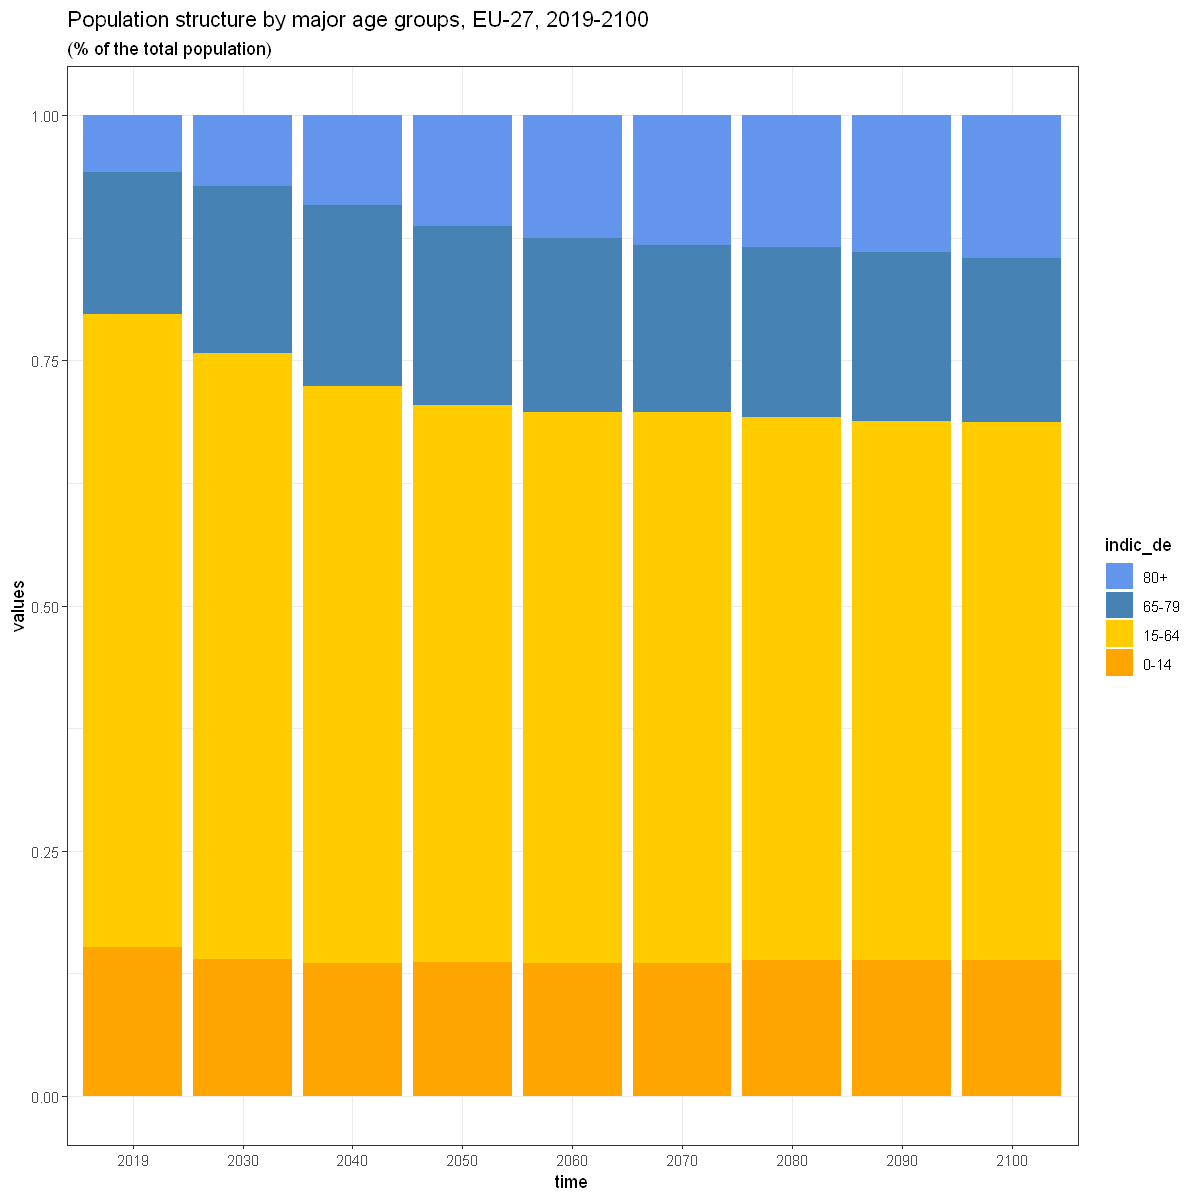

In [129]:
plot3 <-ggplot(dataset3, aes(x=time,y=values, fill=indic_de))+
        geom_bar(aes(x=time, y=values, fill = fct_rev(indic_de)),position=position_fill(reverse=F), stat="identity")+
        scale_fill_manual(values=c( "cornflowerblue","steelblue", "#FFCC00","orange"))+    
labs(title = "Population structure by major age groups, EU-27, 2019-2100",
              subtitle = "(% of the total population)")+
theme_bw()
print(plot3)

### Figure 4: Projected total-age and old-age dependency ratio, EU-27, 2019-2100

In [136]:
assign("dmethod","curl",envir=.restatapi_env) 
get_eurostat_dsd("proj_19ndbi",verbose=TRUE)
dataset4 <- get_eurostat_data(id="proj_19ndbi", filters=list(geo="EU27_2020", projection="BSL", indic_de=c("YOUNGDEP1","OLDDEP1")), verbose=TRUE)[time %in% c(2019,2020, 2025, 2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100)]

The 'proj_19ndbi.dsd' was loaded from 'proj_19ndbi.dsd' in '.restatapi_env'.


concept,code,name
<chr>,<chr>,<chr>
FREQ,D,Daily
FREQ,W,Weekly
FREQ,Q,Quarterly
FREQ,A,Annual
FREQ,S,Semi-annual
FREQ,M,Monthly
FREQ,H,Half-year
PROJECTION,BSL,Baseline projections
PROJECTION,LFRT,Sensitivity test: lower fertility


0.8.10	id%3Dproj_19ndbi	filters%3Dlist(geo = "EU27_2020", projection = "BSL", indic_de = c("YOUNGDEP1", "OLDDEP1"))	verbose%3DTRUE
The 'proj_19ndbi.dsd' was loaded from 'proj_19ndbi.dsd' in '.restatapi_env'.
.BSL.YOUNGDEP1+OLDDEP1.EU27_2020-
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19ndbi/.BSL.YOUNGDEP1+OLDDEP1.EU27_2020/
http://ec.europa.eu/eurostat/SDMX/diss-web/rest/data/proj_19ndbi/.BSL.YOUNGDEP1+OLDDEP1.EU27_2020/
code:  - severity:

restat - nrow:164;ncol:6;colnames:PROJECTION/INDIC_DE/GEO/FREQ/obsTime/obsValue


- In the dataset, for the variable "indic_de" there are only two levels: one for the old dependency ratio and another one for the young dependency ratio, we need a total dependency ratio, computing the sum of the two pre-existing levels with respect to the year;
- To do so: compute a for loop that sums OLD AGE with YOUNG AGE, the result will be a new level, called TOTDEP.

In [131]:
times <-c(2019,2020, 2025, 2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100)

for(i in 1:length(times)){
    year <-times[i]
    dataset4[dataset4$time==year & dataset4$indic_de=="YOUNGDEP1", 5]<-dataset4[dataset4$time==year & dataset4$indic_de=="YOUNGDEP1", 5]+dataset4[dataset4$time==year & dataset4$indic_de=="OLDDEP1", 5]
}
dataset4

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<fct>,<dbl>
BSL,OLDDEP1,EU27_2020,2019,31.4
BSL,OLDDEP1,EU27_2020,2020,32.0
BSL,OLDDEP1,EU27_2020,2025,35.2
BSL,OLDDEP1,EU27_2020,2030,39.1
BSL,OLDDEP1,EU27_2020,2035,43.2
BSL,OLDDEP1,EU27_2020,2040,46.8
BSL,OLDDEP1,EU27_2020,2045,49.8
BSL,OLDDEP1,EU27_2020,2050,52.0
BSL,OLDDEP1,EU27_2020,2055,53.4


In [132]:
levels(dataset4$indic_de)[levels(dataset4$indic_de)=="YOUNGDEP1"] <- "TOTDEP"

- Change the years from characters to numeric values (this is important for line graphs)

In [133]:
dataset4$time<-as.numeric(as.character(dataset4$time))
dataset4

projection,indic_de,geo,time,values
<fct>,<fct>,<fct>,<dbl>,<dbl>
BSL,OLDDEP1,EU27_2020,2019,31.4
BSL,OLDDEP1,EU27_2020,2020,32.0
BSL,OLDDEP1,EU27_2020,2025,35.2
BSL,OLDDEP1,EU27_2020,2030,39.1
BSL,OLDDEP1,EU27_2020,2035,43.2
BSL,OLDDEP1,EU27_2020,2040,46.8
BSL,OLDDEP1,EU27_2020,2045,49.8
BSL,OLDDEP1,EU27_2020,2050,52.0
BSL,OLDDEP1,EU27_2020,2055,53.4


- Visualization option

In [134]:
options(repr.plot.width=10, repr.plot.height=5)

### Projected total and old age dependency ratio: Figure 3

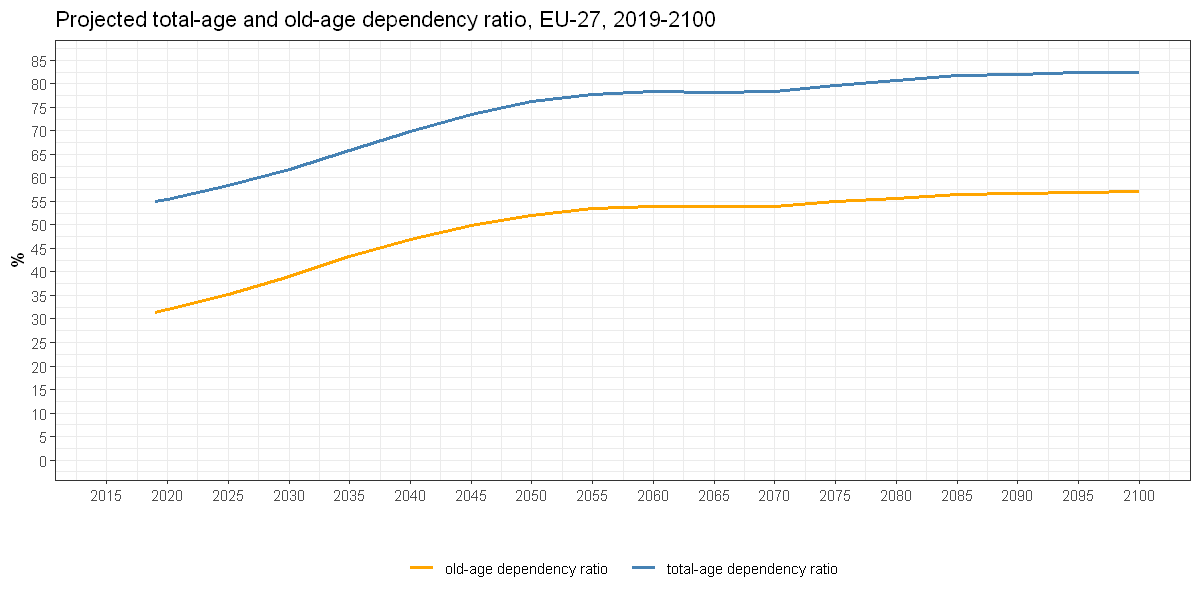

In [135]:
plot4 <- ggplot(data=dataset4, aes(x=time, y=values, group=factor(indic_de), color=factor(indic_de))) + 
                      
geom_line(size=1) +
scale_color_manual(labels = c("old-age dependency ratio", "total-age dependency ratio"), values = c( "orange","steelblue"), name = " ") +
ggtitle("Projected total-age and old-age dependency ratio, EU-27, 2019-2100") +

scale_y_continuous(limits = c(0, 85), breaks = seq(0, 85, by = 5)) +
scale_x_continuous(limits = c(2015,2100), breaks =seq(2015, 2100, by = 5)) +
theme_bw()+  
ylab("%") +
xlab(" ") +
theme(legend.position="bottom")



print(plot4)